# DL Project
## Stock Market Prediction 
In this project we will try to predict the stock market value using the dataset Stock Market Data of USA. 
We will use the LSTM model to predict the values of future stocks

**Index**: stock market index
**Date**: date of information recorded
**Open**: the price at which a stock starts trading.
**High**: show the high price a stock attained for a particular period of time.
**Low**: show the low price a stock attained for a particular period of time.
**Close**: The close is a reference to the end of a trading session in the financial markets when the markets close for the day
**Adj Close**: It is the price at which the last of the stock is bought or sold in the last trading session.
**Volume**: Volume is simply the number of shares traded in a particular stock, index, or other investment over a specific period of time.




In [1]:
import pandas as pd

data = pd.read_excel('DL_Dataset.xlsx')

print(data)

       Index                 Date         Open         High          Low  \
0        NYA           12/31/1965   528.690002   528.690002   528.690002   
1        NYA  1966-03-01 00:00:00   527.210022   527.210022   527.210022   
2        NYA  1966-04-01 00:00:00   527.840027   527.840027   527.840027   
3        NYA  1966-05-01 00:00:00   531.119995   531.119995   531.119995   
4        NYA  1966-06-01 00:00:00   532.070007   532.070007   532.070007   
...      ...                  ...          ...          ...          ...   
112452  N100            5/27/2021  1241.119995  1251.910034  1241.119995   
112453  N100            5/28/2021  1249.469971  1259.209961  1249.030029   
112454  N100            5/31/2021  1256.079956  1258.880005  1248.140015   
112455  N100  2021-01-06 00:00:00  1254.609985  1265.660034  1254.609985   
112456  N100  2021-02-06 00:00:00  1258.489990  1263.709961  1258.239990   

              Close    Adj Close       Volume  
0        528.690002   528.690002       

In [2]:
data['Date'] = pd.to_datetime(data['Date'])  # Converter para datetime
data['Date'] = data['Date'].dt.strftime('%d/%m/%Y')  # Formatar a data no formato 'dd/mm/aaaa'
print(data)

       Index        Date         Open         High          Low        Close  \
0        NYA  31/12/1965   528.690002   528.690002   528.690002   528.690002   
1        NYA  01/03/1966   527.210022   527.210022   527.210022   527.210022   
2        NYA  01/04/1966   527.840027   527.840027   527.840027   527.840027   
3        NYA  01/05/1966   531.119995   531.119995   531.119995   531.119995   
4        NYA  01/06/1966   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100  27/05/2021  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100  28/05/2021  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100  31/05/2021  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100  06/01/2021  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100  06/02/2021  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj Close       Volume  
0   

**Escolhemos não remover duplicados pois podem conter informações uteis para o modelo**

In [3]:
data = data.dropna() # Remover valores nulos do dataset

Agora iremos analisar dados estastísticos do dataset

In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110238.000000,110238.000000,110238.000000,110238.000000,110238.000000,1.102380e+05
mean,7659.533751,7705.450562,7608.965362,7658.517553,7658.373267,1.274149e+09
std,9011.683433,9066.819822,8954.734030,9011.738463,9011.813167,4.316051e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1856.080048,1865.443055,1844.425018,1856.164947,1855.502289,0.000000e+00
50%,5195.604981,5228.150147,5156.045166,5196.040039,5196.084961,4.334000e+05
75%,10135.297363,10207.907718,10060.869872,10135.557130,10135.557130,1.734588e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [5]:
# Passar todos os valores para 2 casas decimais
data['Open'] = data['Open'].round(2)
data['High'] = data['High'].round(2)
data['Low'] = data['Low'].round(2)
data['Close'] = data['Close'].round(2)
data['Volume'] = data['Volume'].round(2)
data['Adj Close'] = data['Adj Close'].round(2)
print(data)

       Index        Date     Open     High      Low    Close  Adj Close  \
0        NYA  31/12/1965   528.69   528.69   528.69   528.69     528.69   
1        NYA  01/03/1966   527.21   527.21   527.21   527.21     527.21   
2        NYA  01/04/1966   527.84   527.84   527.84   527.84     527.84   
3        NYA  01/05/1966   531.12   531.12   531.12   531.12     531.12   
4        NYA  01/06/1966   532.07   532.07   532.07   532.07     532.07   
...      ...         ...      ...      ...      ...      ...        ...   
112452  N100  27/05/2021  1241.12  1251.91  1241.12  1247.07    1247.07   
112453  N100  28/05/2021  1249.47  1259.21  1249.03  1256.60    1256.60   
112454  N100  31/05/2021  1256.08  1258.88  1248.14  1248.93    1248.93   
112455  N100  06/01/2021  1254.61  1265.66  1254.61  1258.58    1258.58   
112456  N100  06/02/2021  1258.49  1263.71  1258.24  1263.62    1263.62   

             Volume  
0               0.0  
1               0.0  
2               0.0  
3          

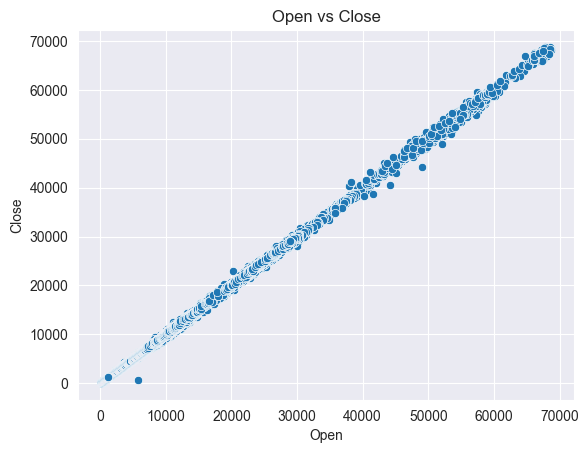

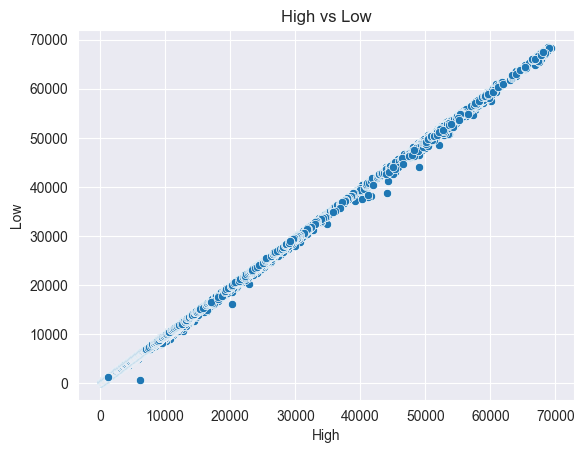

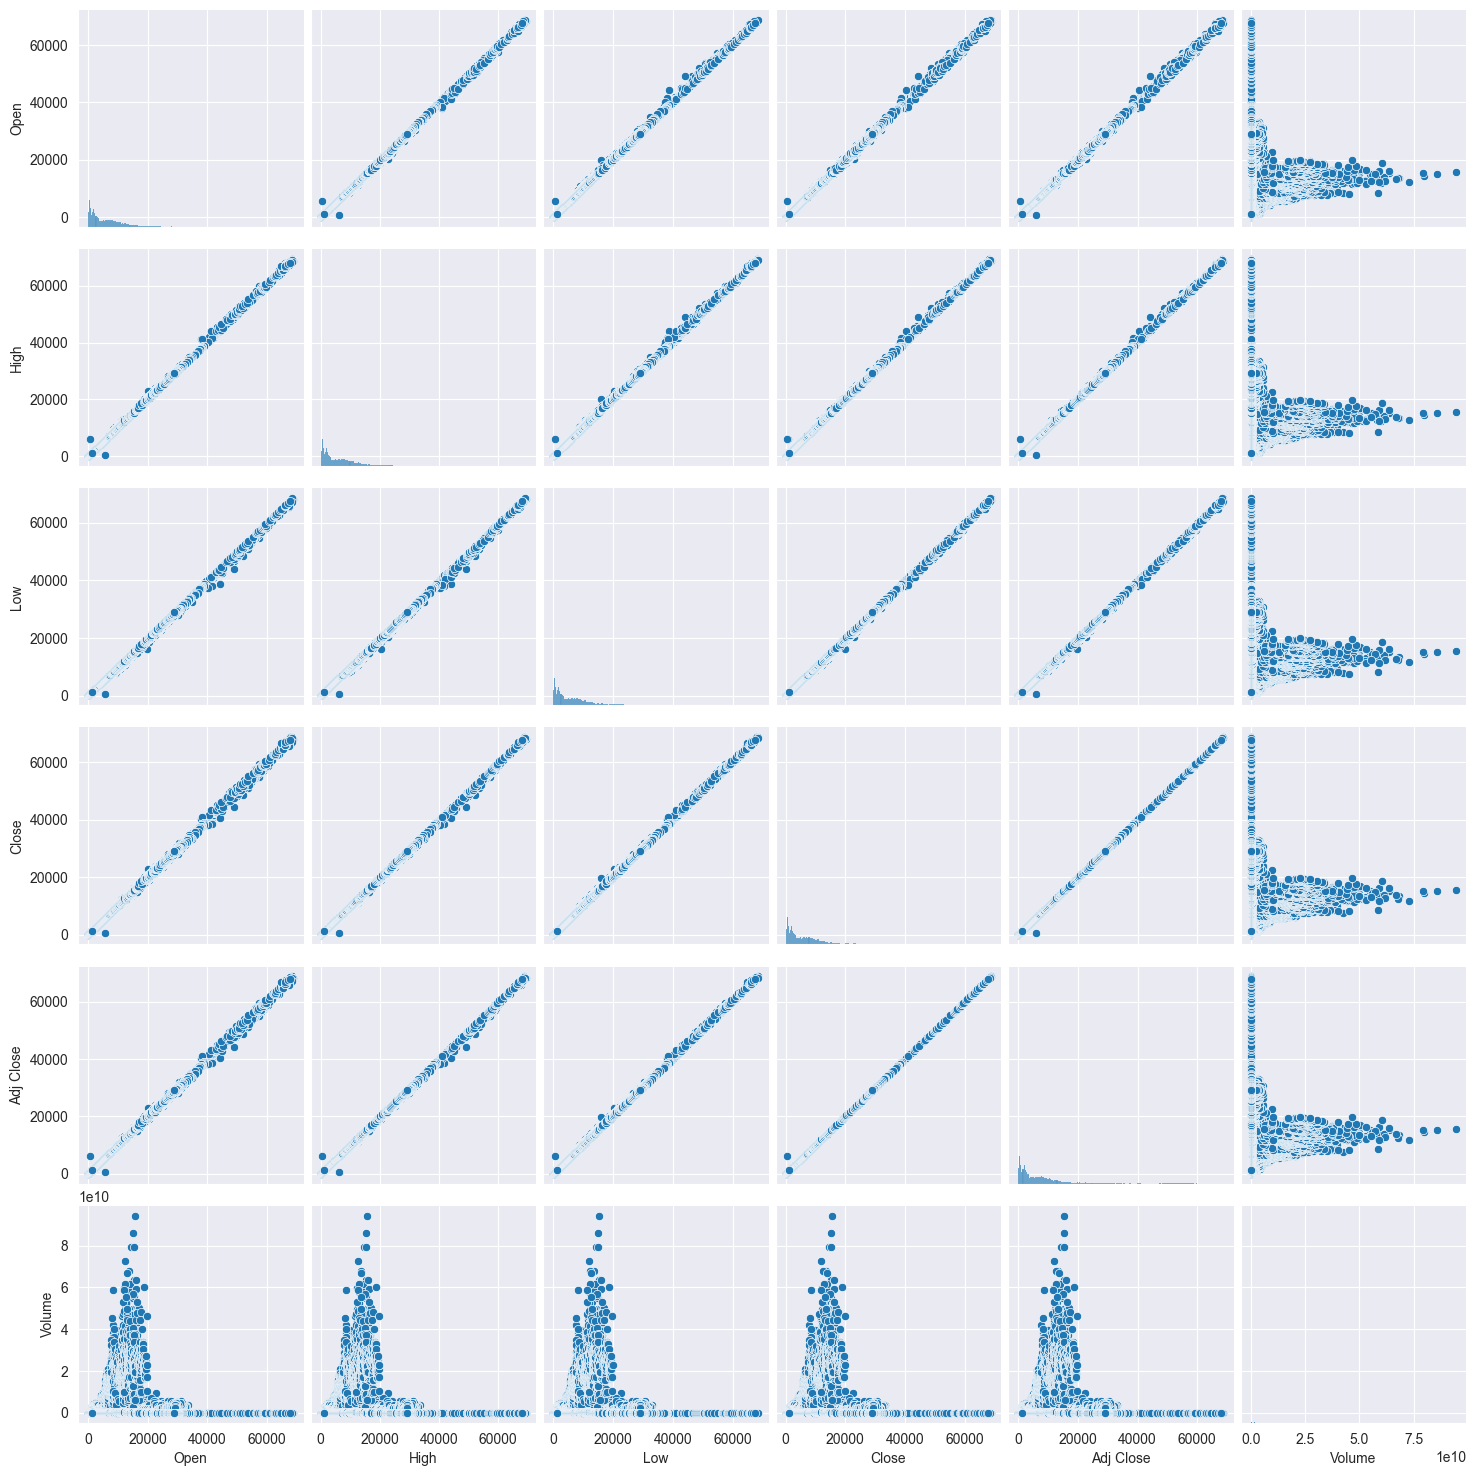

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.scatterplot(data = data, x = 'Open', y = 'Close')
plt.title('Open vs Close')
plt.show()
sns.scatterplot(data = data, x = 'High', y = 'Low')
plt.title('High vs Low')
plt.show()
sns.pairplot(data = data)
plt.show()

No gráfico 'Open vs Close' podemos observar uma relação linear muito forte